## Observations and Insights 

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)

combined_df = pd.merge(mouse_df, study_df, on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [113]:
# Checking the number of mice.
len(combined_df['Mouse ID'].unique())

249

In [114]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]

In [115]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [116]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_duplicates = combined_df[combined_df['Mouse ID'] == 'g989'].index
clean_df = combined_df.drop(index_duplicates)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [117]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# grouped_df = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen")

summary_mean = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
summary_mean = summary_mean.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})

summary_median = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
summary_median = summary_median.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})

summary_variance = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
summary_variance = summary_variance.rename(columns={"Tumor Volume (mm3)": "Variance of Tumor Volume"})

summary_sem = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
summary_sem = summary_sem.rename(columns={"Tumor Volume (mm3)": "SEM of Tumor Volume"})

In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merge1 = pd.merge(summary_mean, summary_median, on="Drug Regimen")
merge2 = pd.merge(merge1, summary_variance, on="Drug Regimen")
merged_summary = pd.merge(merge2, summary_sem, on="Drug Regimen")

merged_summary

,Average Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


In [120]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(['mean', 'median', 'var', 'sem'])
agg_summary

Tumor Volume (mm3)                                
                           mean     median        var       sem
Drug Regimen                                                   
Capomulin             40.675741  41.557809  24.947764  0.329346
Ceftamin              52.591172  51.776157  39.290177  0.469821
Infubinol             52.884795  51.820584  43.128684  0.492236
Ketapril              55.235638  53.698743  68.553577  0.603860
Naftisol              54.331565  52.509285  66.173479  0.596466
Placebo               54.033581  52.288934  61.168083  0.581331
Propriva              52.320930  50.446266  43.852013  0.544332
Ramicane              40.216745  40.673236  23.486704  0.320955
Stelasyn              54.233149  52.431737  59.450562  0.573111
Zoniferol             53.236507  51.818479  48.533355  0.516398

## Bar and Pie Charts

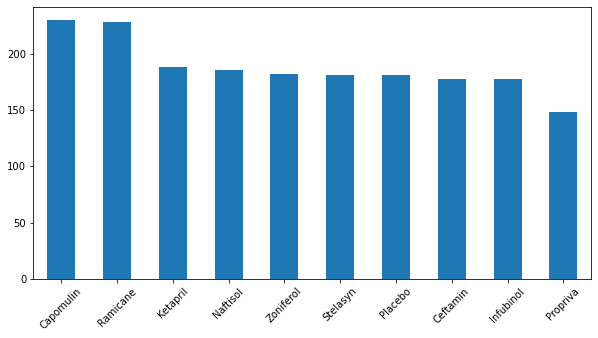

In [121]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measure_count = clean_df["Drug Regimen"].value_counts()
x_axis = measure_count.index
y_axis = measure_count.values

measure_count.plot(x=x_axis, y=y_axis, kind='bar', figsize=(10,5), rot=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

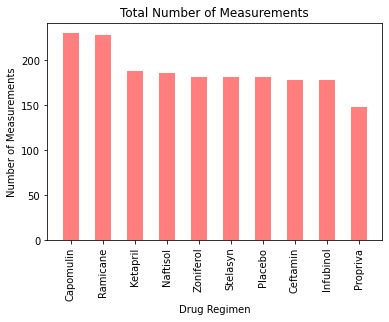

In [122]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measure_count = clean_df["Drug Regimen"].value_counts()
x_axis = measure_count.index
y_axis = measure_count.values

plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center", width=0.5)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements")
plt.xticks(rotation=90)

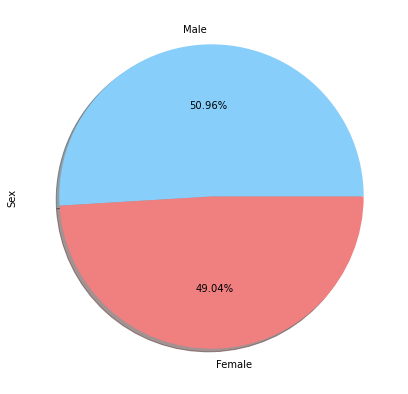

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df["Sex"].value_counts()

gender_count.plot.pie(figsize=(7,7), autopct='%1.2f%%', shadow=True, colors=['lightskyblue', 'lightcoral'])

([<matplotlib.patches.Wedge at 0x1ae73308358>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '50.96%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.04%')])

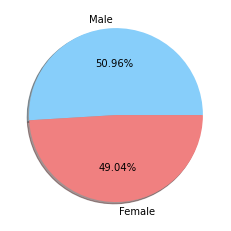

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = clean_df["Sex"].value_counts()
sizes = gender_count.values
labels = gender_count.index

plt.pie(sizes, labels=labels, colors=['lightskyblue', 'lightcoral'], autopct="%1.2f%%", shadow=True)

## Quartiles, Outliers and Boxplots

In [125]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df[["Mouse ID", "Timepoint"]].groupby("Mouse ID").max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_merge = max_timepoint.merge(clean_df, on=["Mouse ID", "Timepoint"])

timepoint_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [132]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    found_rows = timepoint_merge.loc[timepoint_merge["Drug Regimen"] == treatment, ["Tumor Volume (mm3)"]]
    
    # add subset 
    tumor_vol_list.extend(found_rows["Tumor Volume (mm3)"])
    
# Determine outliers using upper and lower bounds
lowerq = np.quantile(tumor_vol_list, 0.25)
upperq = np.quantile(tumor_vol_list, 0.75)
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outliers = timepoint_merge.loc[(timepoint_merge["Tumor Volume (mm3)"] < lower_bound) | (timepoint_merge["Tumor Volume (mm3)"] > upper_bound)]

94.04403868375002

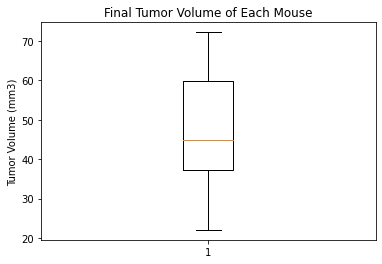

In [135]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_list)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
